In [2]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
df = pd.read_csv('crop.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
#finding the null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
#finding the duplicates
df.duplicated().sum()

0

In [7]:
#finding the the garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10) 

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
******************************


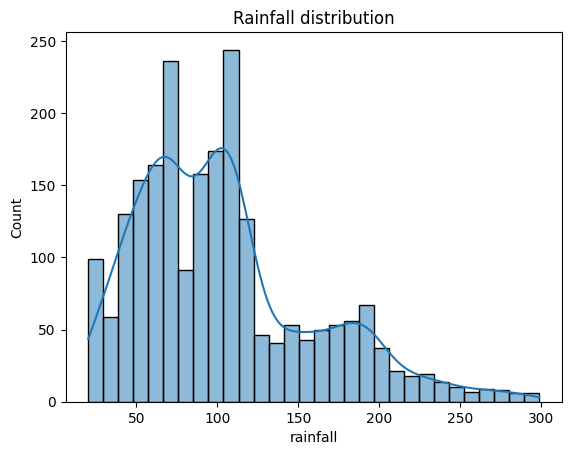

In [8]:
#Data visualization
#Rainfall distribution using  histogram
sbn.histplot(df['rainfall'], bins=30, kde=True)
plt.title('Rainfall distribution')
plt.show()

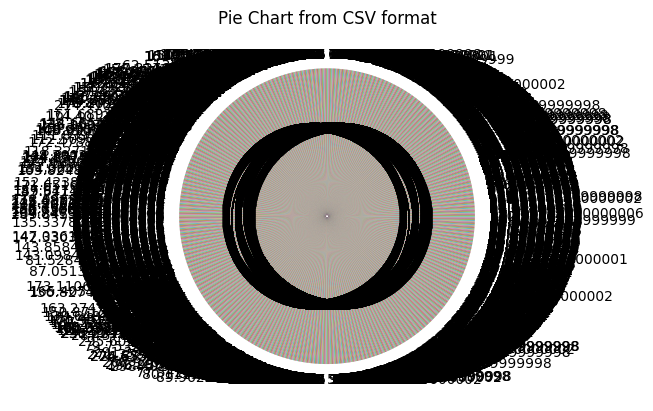

In [9]:
#Group by rainfall and count the occurrences
rainfall_counts=df['rainfall'].value_counts()
#Data visualization
#Rainfall distribution using  Pie chart
#plt.title('Rainfall distributions')
#plt.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()
#create the pie chart
plt.pie(rainfall_counts, labels=rainfall_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart from CSV format')
plt.show()



<Axes: >

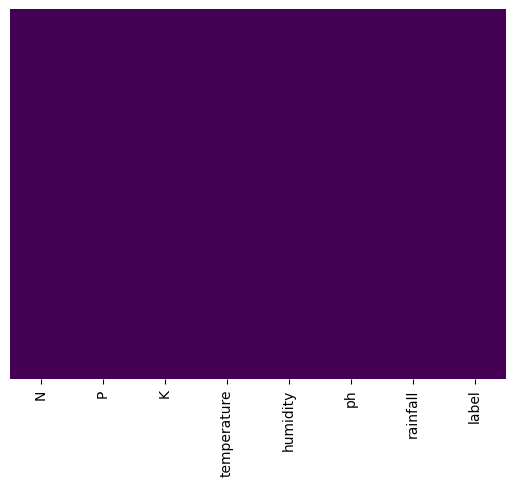

In [10]:
#check for null or missing values using a heatmap
sbn.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
#visualization correlation
c=df.label.astype('category')
targets=dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
x=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

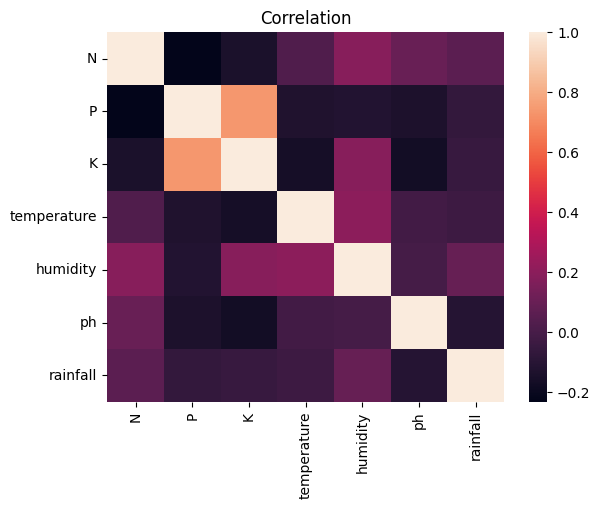

In [12]:
#create correlation visualization
sbn.heatmap(x.corr())
plt.title("Correlation")
plt.show()

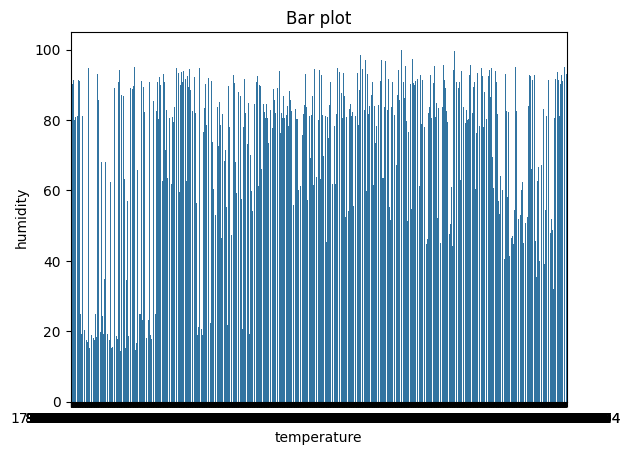

In [13]:
#Data visualization using the bar plot
sbn.barplot(x='temperature', y='humidity', data=df)
plt.title("Bar plot") 
plt.show()

In [14]:
#Machine learning models, set train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)

x_test_scaled=scaler.fit_transform(x_test)